In [1]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../../latent_analysis/'))
sys.path.append(os.path.abspath('../../dPCA/python/'))
import json
from pathlib import Path
from utils import create_directory
from model import test, test2
import plot as plot
import LTransform as LT
from dPCA import dPCA
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import pandas as pd
import seaborn as sns

In [2]:
model_num = 11
phase = 1

model_name = "model{:02d}".format(model_num)
data_dir = create_directory(directory_name='paul')
log_file = list(Path(data_dir).glob(f'{model_name}_phase={phase}_*_log.json'))[0]
weight_file = list(Path(data_dir).glob(f'{model_name}_phase={phase}_*_weights'))[0]
cfg_file = list(Path(data_dir).glob(f'{model_name}_phase={phase}_*_cfg.json'))[0]

Directory '/Users/mahdiyarshahbazi/Documents/Data/MotorNet/paul' already exists.


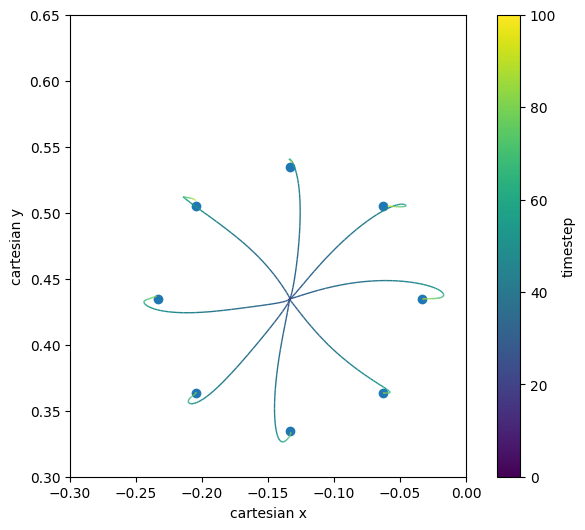

In [14]:
xy, tg, all_hidden, all_muscles = test(cfg_file,weight_file,ff_coefficient=0)
fig, ax  = plot.plot_simulations(xy=xy,target_xy=tg,figsize=(8,6))

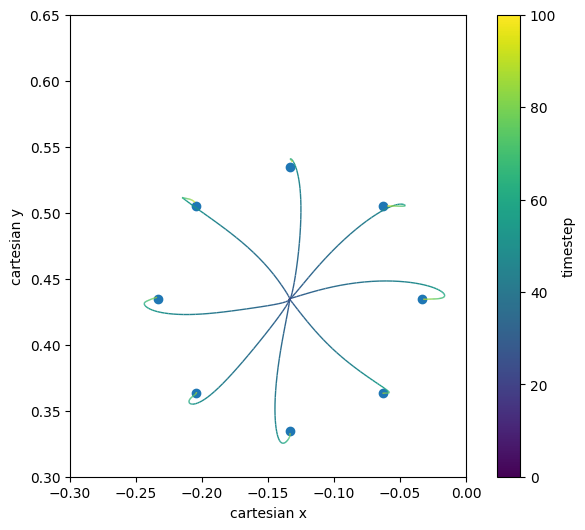

In [11]:
all_hidden=np.array(all_hidden)
xy, tg, all_muscles = test2(cfg_file,weight_file,th.from_numpy(all_hidden),ff_coefficient=0)
fig, ax  = plot.plot_simulations(xy=xy,target_xy=tg,figsize=(8,6))

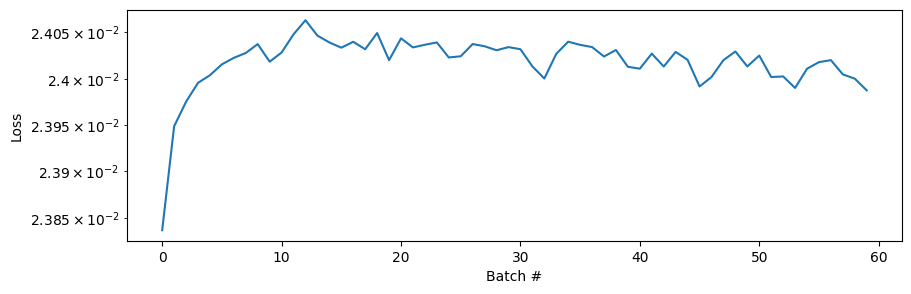

In [12]:
log = json.load(open(log_file,'r'))
fig,ax = plot.plot_training_log(log=log,loss_type='position_loss')

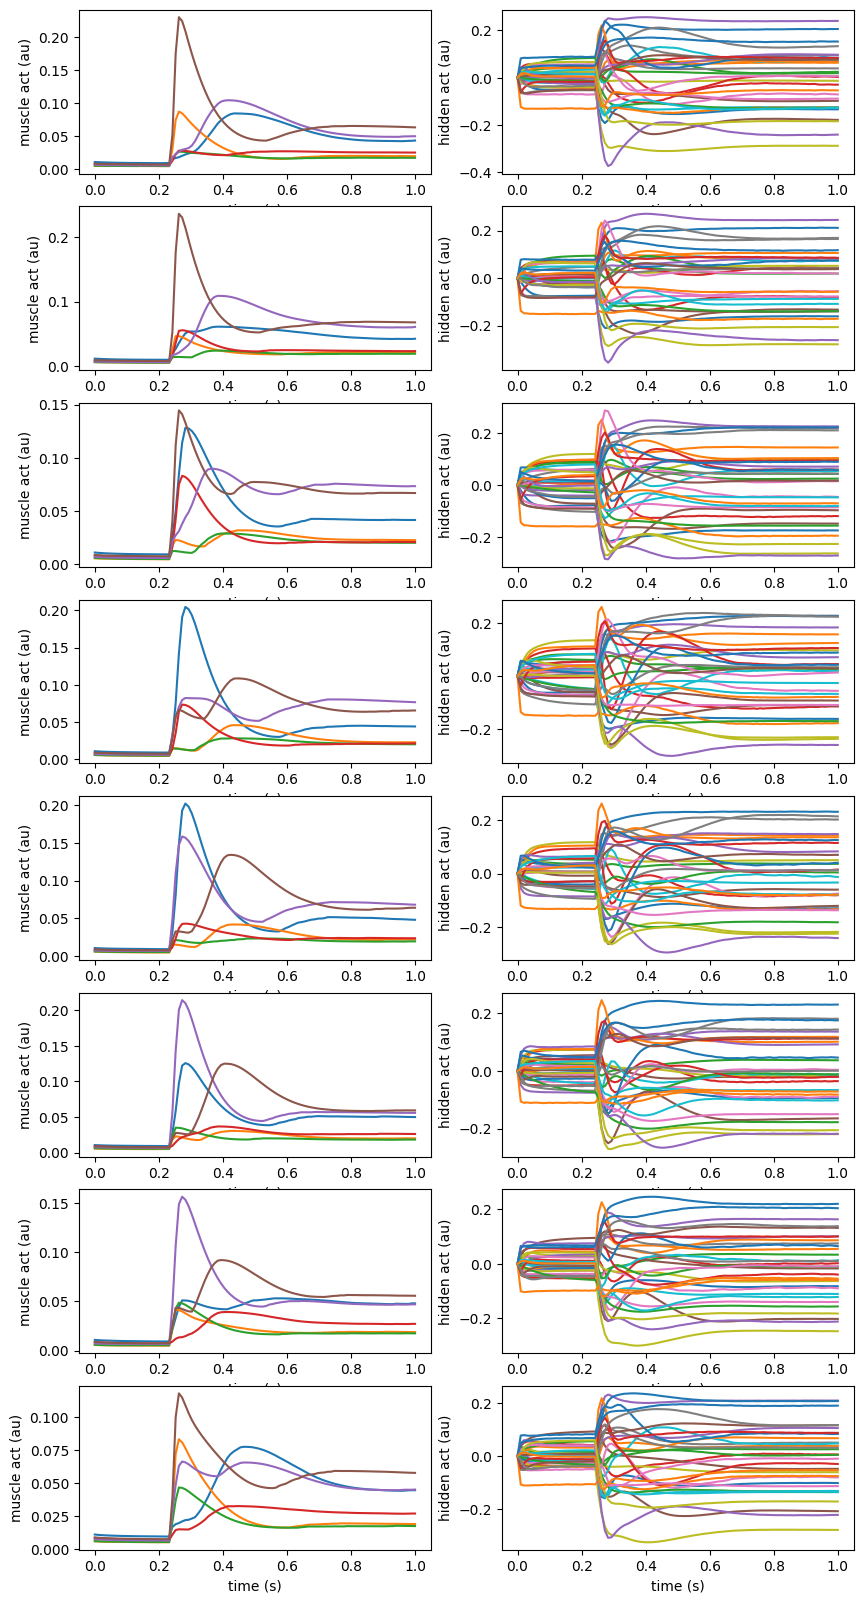

In [4]:
fig, ax = plot.plot_activation(all_hidden, all_muscles)
#fig.savefig(os.path.join(data_dir,'activations.png'),dpi=300)

In [25]:
angle_set = np.deg2rad(np.arange(0,360,45)) # 8 directions
reach_angles = []
for cond in angle_set:
    reach_angles.append(plt.cm.brg(cond/(2*np.pi)))

In [3]:
# Perform PCA on network hidden units trajectories
all_hidden = np.array(all_hidden)
n_mean = np.mean(all_hidden, axis=0, keepdims=True)
rate_scaled = (all_hidden - n_mean)

transform = LT.Transform(num_latent=3)
transform.fit(rate_scaled, method='PCA')

X_ld = transform.transform(rate_scaled,ensure_orthogonality=True)

NameError: name 'all_hidden' is not defined

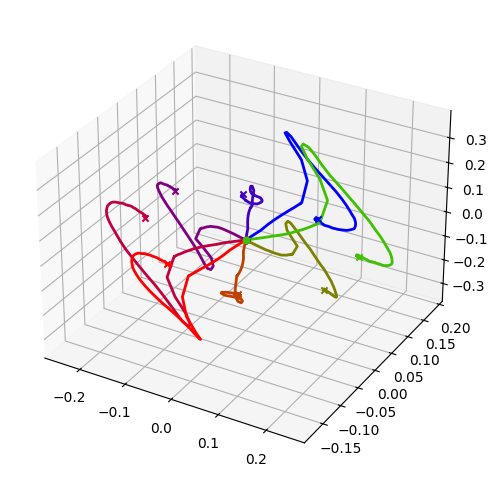

In [39]:
#%matplotlib widget
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111,projection='3d')
for c in range(8):
    ax.plot(X_ld[c,:,0],X_ld[c,:,1],X_ld[c,:,2],lw=2,c=reach_angles[c])
    ax.scatter(X_ld[c,0,0],X_ld[c,0,1],X_ld[c,0,2],color=reach_angles[c])
    ax.scatter(X_ld[c,-1,0],X_ld[c,-1,1],X_ld[c,-1,2],marker='x',color=reach_angles[c])

In [15]:
data_dir

'/Users/mahdiyarshahbazi/Documents/Data/MotorNet/paul'

In [4]:
model_num = 11
model_name = "model{:02d}".format(model_num)

weight_file1 = list(Path(data_dir).glob(f'{model_name}_phase={1}_*_weights'))[0]
cfg_file1 = list(Path(data_dir).glob(f'{model_name}_phase={1}_*_cfg.json'))[0]

_, _, all_hidden1, _ = test(cfg_file1,weight_file1,ff_coefficient=0)
all_hidden1 = np.array(all_hidden1)

weight_file3 = list(Path(data_dir).glob(f'{model_name}_phase={3}_*_weights'))[0]
cfg_file3 = list(Path(data_dir).glob(f'{model_name}_phase={3}_*_cfg.json'))[0]

_, _, all_hidden3, _ = test(cfg_file3,weight_file3,ff_coefficient=0)
all_hidden3 = np.array(all_hidden3)

In [5]:
all_hidden = (all_hidden1+all_hidden3)/2

# Perform PCA on network hidden units trajectories
n_mean = np.mean(all_hidden,axis=0,keepdims=True)
rate_scaled = (all_hidden - n_mean)

transform = LT.Transform(num_latent=3)
transform.fit(rate_scaled,method='PCA')

X1_ld = transform.transform(all_hidden1-n_mean,ensure_orthogonality=True)
X3_ld = transform.transform(all_hidden3-n_mean,ensure_orthogonality=True)


diff_hidden = (all_hidden1-all_hidden3)
diff_hidden = np.tile(np.mean(diff_hidden,axis=0,keepdims=True),[8,1,1])

diff_ld = transform.transform(diff_hidden,ensure_orthogonality=True)
X3_ld_new = X3_ld+diff_ld

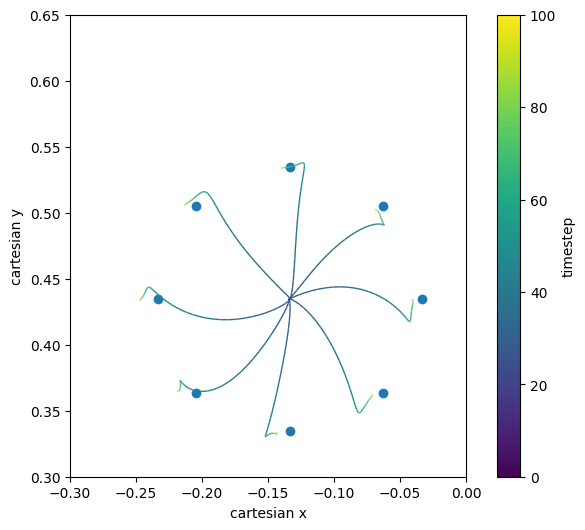

In [6]:
xy, tg, all_muscles = test2(cfg_file3,weight_file3,th.from_numpy(all_hidden3),ff_coefficient=10)
fig, ax  = plot.plot_simulations(xy=xy,target_xy=tg,figsize=(8,6))

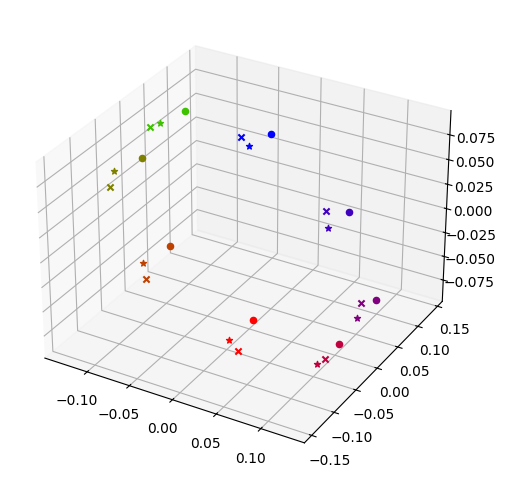

In [45]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111,projection='3d')

idx=24
for c in range(8):
    #ax.plot3D(X1_ld[c,:,0],X1_ld[c,:,1],X1_ld[c,:,2],lw=2,c=reach_angles[c],alpha=1)
    #ax.scatter(X1_ld[c,[0,-1],0],X1_ld[c,[0,-1],1],X1_ld[c,[0,-1],2],color=reach_angles[c],alpha=1)
    ax.scatter(X1_ld[c,[idx],0],X1_ld[c,[idx],1],X1_ld[c,[idx],2],color=reach_angles[c],alpha=1,marker='x')

for c in range(8):
    #ax.plot3D(X3_ld[c,:,0],X3_ld[c,:,1],X3_ld[c,:,2],lw=2,c=reach_angles[c],alpha=0.5)
    #ax.scatter(X3_ld[c,[0,-1],0],X3_ld[c,[0,-1],1],X3_ld[c,[0,-1],2],color=reach_angles[c],alpha=0.5)
    ax.scatter(X3_ld[c,[idx],0],X3_ld[c,[idx],1],X3_ld[c,[idx],2],color=reach_angles[c],alpha=1,marker='o')

for c in range(8):
#     #ax.plot3D(X3_ld_new[c,:,0],X3_ld_new[c,:,1],X3_ld_new[c,:,2],lw=2,c=reach_angles[c],alpha=0.5)
#     #ax.scatter(X3_ld_new[c,[0,-1],0],X3_ld_new[c,[0,-1],1],X3_ld_new[c,[0,-1],2],color=reach_angles[c],alpha=0.5)
     ax.scatter(X3_ld_new[c,[idx],0],X3_ld_new[c,[idx],1],X3_ld_new[c,[idx],2],color=reach_angles[c],alpha=1,marker='*')

In [9]:
all_hidden = np.concatenate((all_hidden1[:,None,:24,:], all_hidden3[:,None,:24,:]), axis=1)

# make it:
# neurons x conditions x learning phase x time
R = all_hidden.transpose(3,0,1,2)
dims = R.shape
# centre data
R -= np.mean(R.reshape((dims[0],-1)),1)[:,None,None,None]

# fit
dpca = dPCA.dPCA(labels='clt',join={'ct':['c','ct'], 'lt':['l','lt'], 'clt':['cl','clt']}, n_components=10)
dpca.protect = ['t']
Z = dpca.fit_transform(R)

In [10]:
var_explained_df = pd.DataFrame(columns=['factor', 'pc', 'variance_explained'])
counter = 0
for name in dpca.explained_variance_ratio_.keys():
    for c in range(dpca.n_components):
        var_explained_df.loc[counter] = {'factor': name, 'pc': c, 'variance_explained': dpca.explained_variance_ratio_[name][c]}
        counter += 1

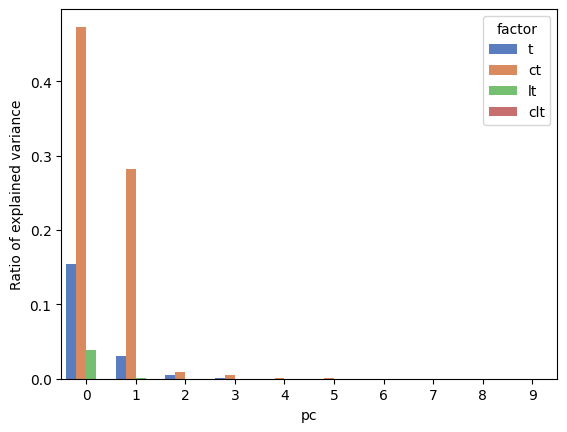

In [11]:
plt.figure()
sns.barplot(var_explained_df, x='pc', y='variance_explained', hue='factor', palette=sns.color_palette('muted', 4))
plt.ylabel('Ratio of explained variance')
plt.show()

In [42]:
Z.keys()

dict_keys(['t', 'ct', 'lt', 'clt'])

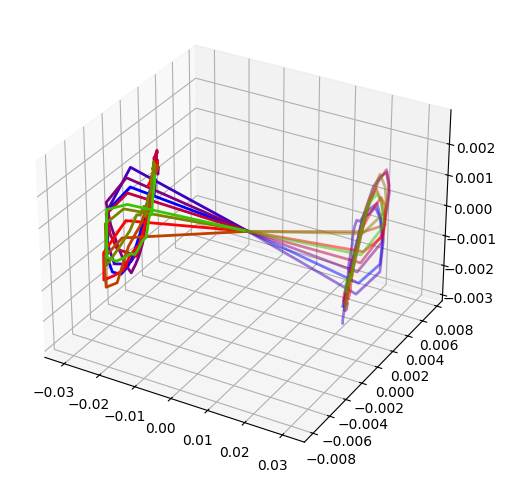

In [44]:
cond1 = Z['lt'][:,:,0,:].transpose(1,2,0)
cond3 = Z['lt'][:,:,1,:].transpose(1,2,0)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111,projection='3d')
for c in range(8):
    ax.plot(cond1[c,:,0],cond1[c,:,1],cond1[c,:,2],lw=2,c=reach_angles[c],alpha=1)

for c in range(8):
    ax.plot(cond3[c,:,0],cond3[c,:,1],cond3[c,:,2],lw=2,c=reach_angles[c],alpha=0.5)